# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

C:\Users\nivelaga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\nivelaga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

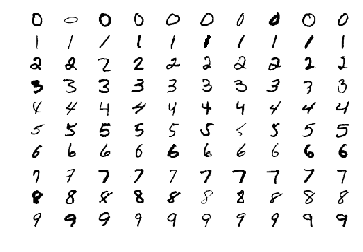

In [59]:
#cast numpy arrays into single dataframe for easy sampling
Viz_DF = pd.concat([pd.DataFrame(mini_train_data), pd.Series(mini_train_labels,name="Labels")], axis=1)
#track subplot index
counter = 1
for i in range(0,10):
    #digit of interest
    data_temp = Viz_DF[Viz_DF.Labels == i].sample(10)
    for j in range (0,10):
        #plot 10 examples
        plt.subplot(10,10,counter)
        plt.axis('off')
        plt.imshow(np.asarray(data_temp.iloc[j][0:len(Viz_DF.columns)-1]).reshape([28,28]),cmap='Greys')
        counter += 1
plt.show()

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [114]:
def P2(k_values):
### STUDENT START ###
#iterate over provided k values
    for k in k_values:
        #train
        Model = KNeighborsClassifier(n_neighbors=k)
        Model.fit(mini_train_data, mini_train_labels)
        if(k == 1):
            #special case, print classification report
            print("Single Neighbor Classification Report: ")
            print(classification_report(Model.predict(dev_data),dev_labels))
        else:
            #normal case, show dev set accuracies
            actuals_preds = pd.concat([pd.Series(dev_labels,name="actual"),pd.Series(Model.predict(dev_data),name="predict")],axis=1)
            corrects = len(actuals_preds[actuals_preds.actual == actuals_preds.predict])
            incorrects = len(actuals_preds[actuals_preds.actual != actuals_preds.predict])
            print('Neighbors: ' + str(k) + ', Correct: ' + str(corrects) + ', Incorrect: ' + str(incorrects) + ', Accuracy: ' + str(corrects/(corrects+incorrects)))

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Single Neighbor Classification Report: 
             precision    recall  f1-score   support

        0.0       0.98      0.91      0.94       107
        1.0       1.00      0.89      0.94       118
        2.0       0.79      0.99      0.88        82
        3.0       0.87      0.77      0.82        97
        4.0       0.82      0.89      0.85        96
        5.0       0.84      0.93      0.88        82
        6.0       0.96      0.94      0.95       100
        7.0       0.92      0.89      0.90       117
        8.0       0.88      0.94      0.91        89
        9.0       0.82      0.78      0.80       112

avg / total       0.89      0.89      0.89      1000

Neighbors: 3, Correct: 878, Incorrect: 122, Accuracy: 0.878
Neighbors: 5, Correct: 869, Incorrect: 131, Accuracy: 0.869
Neighbors: 7, Correct: 865, Incorrect: 135, Accuracy: 0.865
Neighbors: 9, Correct: 863, Incorrect: 137, Accuracy: 0.863


ANSWER: We observe that the hardest digit to classify (from the single neighbor classification report) is 3. We have the worst f1 score for this digit - 4 is a close second. Presumably, most errors belong to classes 8 and 9 respectively.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [6]:
def P3(train_sizes):
    accuracies = []
    times = []
### STUDENT START ###
    #iterate over training sizes
    for train_size in train_sizes:
        #train
        pd_Train = pd.concat([pd.DataFrame(train_data), pd.Series(train_labels,name="Labels")], axis=1)
        sampled_data = pd_Train.sample(train_size)
        Model = KNeighborsClassifier(n_neighbors=1)
        Model.fit(sampled_data.loc[:, sampled_data.columns != 'Labels'],sampled_data.Labels)
        #start timer before prediction
        time1 = time.time()
        predictions = Model.predict(dev_data)
        time2 = time.time()
        #quantify time spent
        perf = time2 - time1
        #compare predictions to actuals
        actuals_preds = pd.concat([pd.Series(dev_labels,name="actual"),pd.Series(predictions,name="predict")],axis=1)
        corrects = len(actuals_preds[actuals_preds.actual == actuals_preds.predict])
        incorrects = len(actuals_preds[actuals_preds.actual != actuals_preds.predict])
        accuracies.append(corrects/(corrects+incorrects))
        times.append(perf)
        #print results
        print('Train Size: ' + str(train_size) + ', Correct: ' + str(corrects) + ', Incorrect: ' + str(incorrects) + ', Accuracy: ' + str(corrects/(corrects+incorrects)))
    return pd.DataFrame(pd.concat([pd.Series(train_sizes,name="trainingData"),pd.Series(accuracies,name="Accuracy"), pd.Series(times,name="Performance")],axis=1))
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
P3_Output = P3(train_sizes)
P3_Output

Train Size: 100, Correct: 626, Incorrect: 374, Accuracy: 0.626
Train Size: 200, Correct: 767, Incorrect: 233, Accuracy: 0.767
Train Size: 400, Correct: 832, Incorrect: 168, Accuracy: 0.832
Train Size: 800, Correct: 860, Incorrect: 140, Accuracy: 0.86
Train Size: 1600, Correct: 905, Incorrect: 95, Accuracy: 0.905
Train Size: 3200, Correct: 927, Incorrect: 73, Accuracy: 0.927
Train Size: 6400, Correct: 943, Incorrect: 57, Accuracy: 0.943
Train Size: 12800, Correct: 958, Incorrect: 42, Accuracy: 0.958
Train Size: 25000, Correct: 970, Incorrect: 30, Accuracy: 0.97


,trainingData,Accuracy,Performance
0,100,0.626,0.088079
1,200,0.767,0.178155
2,400,0.832,0.364815
3,800,0.860,0.758747
4,1600,0.905,1.667374
5,3200,0.927,3.277824
6,6400,0.943,6.606603
7,12800,0.958,13.500546
8,25000,0.970,25.920559


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [115]:
def P4():
    AccuracyRegression = LinearRegression(fit_intercept=True)
    AccuracyRegression.fit(P3_Output.trainingData.reshape(-1,1),P3_Output.Accuracy)
    
    #Logit transform accuracies to constrain outputs to domain (0,1)
    #formula is f(x) = log(x / (1-x))
    P3_Output['TransformedAccuracy'] = np.log(P3_Output.Accuracy / (1-P3_Output.Accuracy))
    AccuracyRegression_tr = LinearRegression(fit_intercept=True)
    AccuracyRegression_tr.fit(P3_Output.trainingData.reshape(-1,1),P3_Output.TransformedAccuracy)

    #convert from logit transformed prediction to "real" probability
    #formula is x = exp(f(x)) / (1+ exp(f(x)))
    prediction_tr = np.exp(AccuracyRegression_tr.predict(60000)) / (1+ np.exp(AccuracyRegression_tr.predict(60000)))

    print("Slope coefficient of the regression is as follows: ")
    print(AccuracyRegression.coef_)
    print("Intercept of the regression is as follows: ")
    print(AccuracyRegression.intercept_)
    print("Predicted accuracy with a 60000 training data sample: " + str(AccuracyRegression.predict(60000)))
    print("Predicted accuracy with a 60000 training data sample (with Logit Transformation): " + str(prediction_tr))
    
P4()

Slope coefficient of the regression is as follows: 
[  8.03348675e-06]
Intercept of the regression is as follows: 
0.82025654658
Predicted accuracy with a 60000 training data sample: [ 1.30226575]
Predicted accuracy with a 60000 training data sample (with Logit Transformation): [ 0.99914008]


C:\Users\nivelaga\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nivelaga\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


ANSWER: Linear regression will not be bounded to the probability domain, as our answer needs to be. We predict an accuracy of 1.28 for a sample of 60,000: which is unreasonable. We could transform the accuracy using the logit scale, which is bounded from 0 to 1. By transforming both the inputs and the outputs in this way, we observe that the accuracy predicted for a 60,000 sample traning data set is .9991.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


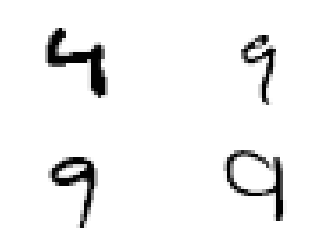

In [113]:
def P5():
#fitting on mini train data
    OneNeighbor_confusion = KNeighborsClassifier(n_neighbors=1)
    OneNeighbor_confusion.fit(mini_train_data,mini_train_labels)
    #zip together predictions and actuals
    PredictionsMatrix = pd.concat([pd.DataFrame(dev_data),pd.Series(dev_labels,name="actual"),pd.Series(OneNeighbor_confusion.predict(dev_data),name="Predictions")],axis=1)
    #confusion matrix calculation
    print(confusion_matrix(PredictionsMatrix.actual,PredictionsMatrix.Predictions))
    dev_data_pd = pd.DataFrame(dev_data)
    errorSample = dev_data_pd[((PredictionsMatrix.actual == 9) & (PredictionsMatrix.Predictions == 4)) | ((PredictionsMatrix.actual == 4) & (PredictionsMatrix.Predictions == 9))][0:783].sample(4)
    counter = 1
    
    for j in range (0,4):
        #plot 10 examples
        plt.subplot(2,2,counter)
        plt.axis('off')
        plt.imshow(np.asarray(errorSample.iloc[j]).reshape([28,28]),cmap='Greys')
        counter += 1
P5()
#we see that 4 and 9 are most often confused

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [11]:
def GaussianBlur(img):
    #pixel of interest gets full weight
    #directly adjacent pixels get 1/2 weight
    #diagonals weighted as 1/sqrt(8) due to increased distance to center of pixel of interest (pythagorean theorem if both sides are of length 2)
    shape_img = img.reshape(28,28)
    new_img = []
    for width in range(0,28):
        for height in range(0,28):
            #count pixels used in average, tally total pixel "darkness" using surrounded pixels and pixel of interest
            counter = 0
            value = 0
            value += shape_img[width, height]
            counter += 1
            
            if (height - 1 >= 0): #top
                value += shape_img[width, height-1]/2
                counter += 1
            if (width - 1 >= 0): #left
                value += shape_img[width-1, height]/2
                counter += 1
            if (width + 1 < 28): #right
                value += shape_img[width+1, height]/2
                counter += 1
            if (height + 1 < 28): #bottom
                value += shape_img[width, height+1]/2
                counter += 1
            if ((height - 1 >= 0) & (width - 1 >= 0)): #top-left
                value += shape_img[width-1, height-1]/np.sqrt(8)
                counter += 1
            if ((height - 1 >= 0) & (width + 1 < 28)): #top-right
                value += shape_img[width-1, height-1]/np.sqrt(8)
                counter += 1
            if ((height + 1 < 28) & (width - 1 >= 0)): #bottom-left
                value += shape_img[width-1, height-1]/np.sqrt(8)
                counter += 1
            if ((height + 1 < 28) & (width + 1 < 28)): #bottom-right
                value += shape_img[width-1, height-1]/np.sqrt(8)
                counter += 1
            new_img.append(value/counter)
    return(np.asarray(new_img))


def P6():
    blur_mini_train_data = np.apply_along_axis(GaussianBlur, 1, mini_train_data)
    blur_dev_data = np.apply_along_axis(GaussianBlur, 1, dev_data)
    
    #processed training, not dev
    OneNeighbor_confusion = KNeighborsClassifier(n_neighbors=1)
    OneNeighbor_confusion.fit(blur_mini_train_data,mini_train_labels)
    blurTrain_RawDev = pd.Series(OneNeighbor_confusion.predict(dev_data),name="BlurTrain_Predict")
    
    #processed dev, not training
    OneNeighbor_confusion = KNeighborsClassifier(n_neighbors=1)
    OneNeighbor_confusion.fit(mini_train_data,mini_train_labels)
    RawTrain_BlurDev = pd.Series(OneNeighbor_confusion.predict(blur_dev_data),name="BlurDev_Predict")
    
    #process both dev and training
    OneNeighbor_confusion = KNeighborsClassifier(n_neighbors=1)
    OneNeighbor_confusion.fit(blur_mini_train_data,mini_train_labels)
    BlurTrain_BlurDev = pd.Series(OneNeighbor_confusion.predict(blur_dev_data),name="BlurBoth_Predict")
    
    PredictionsMatrix = pd.concat([pd.Series(dev_labels,name="actual"),blurTrain_RawDev,RawTrain_BlurDev,BlurTrain_BlurDev],axis=1)
    return PredictionsMatrix

GaussianPredictions = P6()

print("Blur Training Only Prediction accuracy: " + str(len(GaussianPredictions[GaussianPredictions.actual == GaussianPredictions.BlurTrain_Predict])/1000))
print("Blur Dev Only Prediction accuracy: " + str(len(GaussianPredictions[GaussianPredictions.actual == GaussianPredictions.BlurDev_Predict])/1000))
print("Blur Both Prediction accuracy: " + str(len(GaussianPredictions[GaussianPredictions.actual == GaussianPredictions.BlurBoth_Predict])/1000))

Blur Training Only Prediction accuracy: 0.853
Blur Dev Only Prediction accuracy: 0.261
Blur Both Prediction accuracy: 0.9


ANSWER: We can see that the best accuracy is attained when blurring both the training data set and the dev training set. We achieve extraordinarily poor accuracy when blurring the dev set only but leaving the training set untouched.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [12]:
def castToTernary(dataPoint):
    #map pixel value to 0,1,2
    if(dataPoint == 0):
        return 0
    elif (dataPoint < .5):
        return 1
    else:
        return 2

def P7():
### STUDENT START ###
    BernoulliNB_digits = BernoulliNB(binarize=0.0)
    BernoulliNB_digits.fit(mini_train_data,mini_train_labels)
    
    predictionsDF = pd.concat([pd.Series(dev_labels,name='Actual'),pd.Series(BernoulliNB_digits.predict(dev_data),name='predictions')],axis=1)
    print("Accuracy of binarized data: " + str(len(predictionsDF[predictionsDF.Actual==predictionsDF.predictions])/1000))
    
    ternary_mtd = np.array([castToTernary(point) for point in np.nditer(mini_train_data)])
    MultiNB_digits = MultinomialNB()
    MultiNB_digits.fit(ternary_mtd.reshape(1000,784),mini_train_labels)
    
    ternary_devData = np.array([castToTernary(point) for point in np.nditer(dev_data)]).reshape(1000,784)
    predictionsDF = pd.concat([pd.Series(dev_labels,name='Actual'),pd.Series(MultiNB_digits.predict(ternary_devData),name='predictions')],axis=1)
    print("Accuracy of ternary data: " + str(len(predictionsDF[predictionsDF.Actual==predictionsDF.predictions])/1000))

    
### STUDENT END ###

P7()

Accuracy of binarized data: 0.815
Accuracy of ternary data: 0.795


ANSWER: We can see that the binarized NB model outperforms the ternary model by 2 percent in terms of accuracy. This could be due to the fact that the dev set has different uses of "grey" than the training set. It could also be that the choices of boundaries for grey versus black are set improperly: in practice, I would iterate over different definitions of grey and black to see what optimizes accuracy.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [13]:
def P8(alphas):
    BernoulliNB_digits = BernoulliNB(binarize=0.0)
    GridSearch = GridSearchCV(BernoulliNB_digits,param_grid=alphas)
    GridSearch.fit(mini_train_data,mini_train_labels)
    return GridSearch

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

C:\Users\nivelaga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\nivelaga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\nivelaga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [14]:
print(pd.DataFrame(nb.grid_scores_))
print(nb.best_params_)

          parameters  mean_validation_score  \
0     {'alpha': 0.0}                  0.803   
1  {'alpha': 0.0001}                  0.820   
2   {'alpha': 0.001}                  0.820   
3    {'alpha': 0.01}                  0.820   
4     {'alpha': 0.1}                  0.821   
5     {'alpha': 0.5}                  0.819   
6     {'alpha': 1.0}                  0.812   
7     {'alpha': 2.0}                  0.810   
8    {'alpha': 10.0}                  0.775   

                               cv_validation_scores  
0  [0.843195266272, 0.768768768769, 0.796352583587]  
1  [0.849112426036, 0.795795795796, 0.814589665653]  
2  [0.849112426036, 0.792792792793, 0.817629179331]  
3  [0.855029585799, 0.792792792793, 0.811550151976]  
4  [0.855029585799, 0.798798798799, 0.808510638298]  
5  [0.849112426036, 0.804804804805, 0.802431610942]  
6  [0.837278106509, 0.801801801802, 0.796352583587]  
7  [0.834319526627, 0.801801801802, 0.793313069909]  
8  [0.795857988166, 0.753753753754, 0.77507

ANSWER: We observe that an alpha of 0.1 has the best validation score. An alpha of 0.0 gives a mean validation score of .803. The LaPlace smoothing parameter adds a constant to all variable observations. In this case, if a particular pixel has never been black, the model may put undue weight on a black instance of this pixel. Larger smoothing values "reduce" the probably effect of novel observations. An alpha of 0.0 indicates no smoothing at all - it's unsurprising that this has a relatively high accuracy, since the digits are mostly clean and generally centered in the image renderings.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [29]:
def GaussianNoise(value,mean,variance):
    #assumes we're being passed a 784 dimensional array
    #add gausian noise with specified characteristics
    return value + np.random.normal(loc=mean,scale=variance,size=len(value))

def P9():

### STUDENT END ###
    #train model with no adjustment
    GNB_digits = GaussianNB()
    GNB_digits.fit(mini_train_data,mini_train_labels)

    predictionsDF = pd.concat([pd.Series(dev_labels,name='Actual'),pd.Series(GNB_digits.predict(dev_data),name='predictions')],axis=1)
    print("Accuracy using GNB, untransformed: " + str(len(predictionsDF[predictionsDF.Actual==predictionsDF.predictions])/1000))
    
    #train model with adjustment
    GNB_digits = GaussianNB()
    GNB_digits.fit(np.apply_along_axis(GaussianNoise, axis=1,arr=mini_train_data,mean=0,variance=.10),mini_train_labels)

    predictionsDF = pd.concat([pd.Series(dev_labels,name='Actual'),pd.Series(GNB_digits.predict(dev_data),name='predictions')],axis=1)
    print("Accuracy using GNB, white noise added: " + str(len(predictionsDF[predictionsDF.Actual==predictionsDF.predictions])/1000))
    
    return GNB_digits
### STUDENT END ###

gnb = P9()

Accuracy using GNB, untransformed: 0.621
Accuracy using GNB, white noise added: 0.79


In [34]:
len(np.unique(mini_train_data))

256

ANSWER: The GaussianNB model is intended for real-valued features, our images are composed of discrete greyscale values in the pixels. There are 256 unique pixel values observed. This leads to the sigma and theta results observed. The solution is to add Gaussian noise to every pixel value, effectively ensuring these observations are indeed continuous. The GaussianNoise function I defined above does this - different variances provide a different performance. I see a somewhat optimized accuracy using a mean of 0 and a variance of 10 in the gaussian noise.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

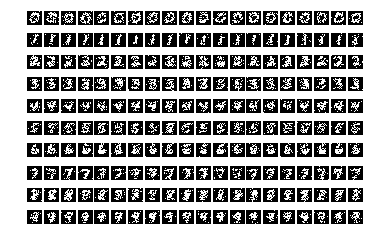

In [60]:
def P10(num_examples):
    BernoulliNB_digits = BernoulliNB(binarize=0.0)
    BernoulliNB_digits.fit(mini_train_data,mini_train_labels)
### STUDENT START ###
    counter = 1
    for i in range(0,10):
        for j in range(0,num_examples):
            Probs = np.exp(BernoulliNB_digits.feature_log_prob_[i,:])
            RandPixels = np.random.rand(784)
            BinaryRandPixels = (RandPixels >= Probs)
            plt.subplot(10,num_examples,counter)
            plt.axis('off')
            plt.imshow(BinaryRandPixels.reshape([28,28]),cmap='Greys')
            counter += 1
### STUDENT END ###

P10(20)

ANSWER: The images are not bad - the "lines" of the digit are less discrete and there are gaps in the middle where even high probability pixels occasionally end up blank. That being said, these examples can generally be interpreted to the digit of origin by the human eye.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [61]:
BernoulliNB_digits = BernoulliNB(binarize=0.0,alpha=0.1)
BernoulliNB_digits.fit(mini_train_data,mini_train_labels)

predictions = BernoulliNB_digits.predict(dev_data)
confidences = BernoulliNB_digits.predict_proba(dev_data)

In [95]:
def P11(buckets, correct, total):  
### STUDENT START ###
    BernoulliNB_digits = BernoulliNB(binarize=0.0,alpha=0.1)
    BernoulliNB_digits.fit(mini_train_data,mini_train_labels)

    predictions = BernoulliNB_digits.predict(dev_data)
    predictionsDF = pd.concat([pd.Series(dev_labels,name='Actual'),pd.Series(BernoulliNB_digits.predict(dev_data),name='predictions')],axis=1)
    predictionsDF['Correct'] = (predictionsDF.Actual == predictionsDF.predictions)

    confidences = BernoulliNB_digits.predict_proba(dev_data)
    #artificially setting limit on confidences to 0.5, since thats our minimum bucket.
    ConfBuckets = np.digitize(right=True,x=np.amax(confidences,axis=1), bins=[0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0])
    Aggregate = pd.concat([predictionsDF.Correct,pd.Series(np.amax(confidences,axis=1),name='MaxConf'),pd.Series(ConfBuckets,name='ConfBucket')],axis=1)

    Aggregate = pd.concat([Aggregate.groupby('ConfBucket')['Correct'].agg(['sum','count']), pd.Series(buckets,name='ConfidenceBin')],axis=1).reset_index()
    Aggregate.drop('ConfBucket',inplace=True,axis=1)
    Aggregate.set_index('ConfidenceBin')
    Aggregate['Accuracy'] = Aggregate['sum'] / Aggregate['count']
    
    return Aggregate
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

Aggregate = P11(buckets, correct, total)
correct = np.asarray(Aggregate['sum'])
total = np.asarray(Aggregate['count'])

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
        
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' % (buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   2    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  31    accuracy = 0.387
p(pred) <= 0.9990000000000    total =  71    accuracy = 0.493
p(pred) <= 0.9999900000000    total =  53    accuracy = 0.434
p(pred) <= 0.9999999000000    total =  64    accuracy = 0.609
p(pred) <= 0.9999999990000    total =  46    accuracy = 0.543
p(pred) <= 0.9999999999900    total =  52    accuracy = 0.808
p(pred) <= 0.9999999999999    total =  49    accuracy = 0.796
p(pred) <= 1.0000000000000    total = 632    accuracy = 0.951


ANSWER: It appears that the calibration for our Naive Bayes model is reasonably good. We see a positive correlation between the posterior probability and the accuracy of the bin. That being said, the accuracy values are not a 1:1 mapping with the confidence itself (e.g. 90% posterior does not correlate to a 90% accuracy).

PS: My approach to this problem didn't follow the instructions in entirety: rather than iterate through the predictions, I used np.digitize to bucketize all confidences at once. The group by command then let me summarize correct and incorrect by those buckets. I return a dataframe that has bucket, count, correct, and accuracy attributes and reproduce the "correct" and "total" vectors for the text printing from that. Apologies for any inconvenience: but the vectorized approach seemed more appropriate.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()